In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Lee seohyun\Desktop\taxi_drive.csv',encoding='cp949')
df = df.copy()
df

Unnamed: 0              time              ID  \
0               0   2017-08-02 9:29     달(muni****)   
1               1   2017-08-02 9:28        gold****   
2               2   2017-08-02 9:24   고이오(jumi****)   
3               3   2017-08-02 0:09   너구리(bok6****)   
4               4   2017-08-02 0:04    나무(namo****)   
...           ...               ...             ...   
48737       48737   2017-08-03 9:54  더블에이(i2us****)   
48738       48738  2017-08-06 13:13        jwle****   
48739       48739  2017-08-02 18:14        amd8****   
48740       48740  2017-08-02 15:24        anfl****   
48741       48741  2017-08-02 16:10    닉값(gus_****)   

                                                    text  score   like  \
0      송강호 유해진 류준열이 한번씩 눈물 쏟게 만듦.. 그날의 광주에 택시운전사와 함께 ...     10  18539   
1                             최근에 본 영화중 가장 돈이 안 아까운 영화!      10  16880   
2      신파일까봐 걱정했는데 신파는 커녕 눈물이 날만하면 가차없이 유쾌함을 던져주던 담백한...     10  13315   
3      슬프지만 꼭 한번 봐야 할 영화!권력에 굴복하지 않았던 당당한 시민들과 위르겐 힌츠...     10  11895   
4      배우들 연기 때문에 그리고 역사적 상황때문에 넘 마니 울었어요ㅠ가슴이 먹먹하고 뭉클...     10   9072   
...                                                  ...    ...    ...   
48737                                    평점은 공장에서 조작되었다       3     68   
48738  영화 선동 참 쉽네. 한쪽 단면만 보여주면서 개미같은 백성들 혼을 쏙 빼놓기 쉽네....      1     60   
48739                                     픽션이 너무 많았음...       3     69   
48740                              그저 그런 영화웬만하면 보지말길...       3     74   
48741  이 영화는 판타지영화다.역사적 사실을 부정하는게 아니라 내용이 그렇다.앞뒤내용이 너...      1    102   

       dislike  watch_movie  
0         1856         True  
1         1888         True  
2         1451         True  
3         1237        False  
4         1145        False  
...        ...          ...  
48737      265         True  
48738      258         True  
48739      279         True  
48740      322         True  
48741      492         True  

[48742 rows x 8 columns]

In [6]:
df.isnull().sum()

Unnamed: 0     0
time           0
ID             0
text           0
score          0
like           0
dislike        0
watch_movie    0
dtype: int64

In [16]:
#중복 ID 확인
duplicated_ID = df[df.duplicated(['ID'], keep=False) == True]
pd.DataFrame(duplicated_ID['ID'].value_counts())

ID
love****  56
park****  26
shin****  25
blue****  22
sung****  22
...       ..
mose****   2
hano****   2
fors****   2
skyk****   2
mist****   2

[1299 rows x 1 columns]

In [24]:
#중복 아이디 댓글이 겹치는지 -> 중복댓글 제거했기 때문에 겹치지 않음.
df[df['ID'] == 'mist****']

Unnamed: 0              time        ID  \
12275       12275  2017-08-04 21:05  mist****   
23930       23930  2017-08-03 21:54  mist****   

                                                    text  score  like  \
12275  감정이입 만땅해서 본 영화입니다.커피를 진하게 마셔서 가슴떨림이 긴장감 고조를 해서...     10     2   
23930   송강호 말고 누가 저역할을 할수 있을까요?유해진 말고  누가 저역학을 할수 있을까요?      10     1   

       dislike  watch_movie  
12275        0        False  
23930        0        False

### 키워드 분석
- 전체 댓글

In [29]:
#한글설정
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

In [3]:
text = ' '.join(df['text'])
text

'송강호 유해진 류준열이 한번씩 눈물 쏟게 만듦.. 그날의 광주에 택시운전사와 함께 다녀온 듯 먹먹하다  최근에 본 영화중 가장 돈이 안 아까운 영화!  신파일까봐 걱정했는데 신파는 커녕 눈물이 날만하면 가차없이 유쾌함을 던져주던 담백한 영화,,덕분에 억지 눈물이 아닌 진짜 눈물만 나왔다  슬프지만 꼭 한번 봐야 할 영화!권력에 굴복하지 않았던 당당한 시민들과 위르겐 힌츠페터님께 감사드립니다.  배우들 연기 때문에 그리고 역사적 상황때문에 넘 마니 울었어요ㅠ가슴이 먹먹하고 뭉클해지실꺼예요  단순히 픽션인줄 알았더니 사실에 기반한 영화였다.보는내내 눈물났고,옆자리 할머니 할아버지들 무지 우셨다 눈물이 마르지않으시는듯 계속 우셨다 빨갱이란 단어가 왜 쓰였는지도 알수 있다 전두환은 최대한 괴롭게 죽었으면.. 젊은세대들이 꼭 봐야할영화  우리가 꼭 목격해야 할 1980년 5월의 광주.  실컷 웃기더니 더 크게 울림  기다리던영화라 시사회로 보고왔어요. 다루기어려운소재인만큼 마음도 묵직해지는 영화였어요. 꼭봐야할영화로 강추입니다!  이번에 시사회 당첨되서 신랑이랑 보러갔는데 영화 끝나고 마음이 먹먹해지면서 엄청 울었네요..귀찮다고 안갔으면 후회할뻔ㅜ올해 한국 영화 중에 천만 찍을거 같아용 기대합니당  아.. 아침부터 여운이.. 그날을 바라보는 새로운 시선과 감동 웃음의 적절한 드라마...오늘 하루 계속 생각날듯  우린 그때그상황을 그 분들을 잊지않았다고 말해주고싶다ㅠㅠㅠㅠ배우들이 연기를 너무잘해서 더 몰입해서 볼 수있었던 영화ㅠㅠ  영화 잘 봤습니다 유쾌하다가도 가슴 먹먹해지는... 간만에 좋은 영화 본 것 같네요 송강호 유해진 류준열 연기 최고에요 ㅠㅠㅠ  위르겐 힌츠페터... 정말.. 잊어서는 안되는 아니 잊을수없는 인물..  재미 슬픔 감동 모두 있는 영화ㅠ 가족들과 함께 봤는데 부모님도 엄청 재밌게 잘 보셨습니다~ 강추!  이 땅에 살게 해 주신 많은 분들께 감사합니다 ㅠㅠㅠ  송강호에 이입할 수 밖에 없었어요.. 정말 몰입해서 봤습니다ㅠㅠ 엄마아빠 모시고 또 

In [4]:
import nltk
from konlpy.tag import Okt

t = Okt()

tokens_ko = t.nouns(text)
tokens_ko

['송강호',
 '유해진',
 '류준열',
 '한번',
 '눈물',
 '그날',
 '광주',
 '택시',
 '운전사',
 '듯',
 '최근',
 '영화',
 '가장',
 '돈',
 '안',
 '영화',
 '신파',
 '걱정',
 '신파',
 '커녕',
 '눈물',
 '날',
 '만하',
 '가차',
 '영화',
 '덕분',
 '억지',
 '눈물',
 '진짜',
 '눈물',
 '꼭',
 '한번',
 '영화',
 '권력',
 '굴복',
 '시민',
 '위르겐',
 '힌츠페터',
 '감사',
 '배우',
 '연기',
 '때문',
 '역사',
 '상황',
 '때문',
 '가슴',
 '픽션',
 '줄',
 '사실',
 '기반',
 '영화',
 '옆',
 '할머니',
 '할아버지',
 '무지',
 '눈물',
 '마르지',
 '계속',
 '빨갱이',
 '란',
 '단어',
 '왜',
 '전두환',
 '최대한',
 '세대',
 '꼭',
 '영화',
 '우리',
 '꼭',
 '목격',
 '광주',
 '실컷',
 '더',
 '크게',
 '울림',
 '영화',
 '시사회',
 '소재',
 '마음',
 '영화',
 '꼭',
 '영화로',
 '강추',
 '이번',
 '시사회',
 '당첨',
 '신랑',
 '영화',
 '마음',
 '지면',
 '후회',
 '뻔',
 '올해',
 '한국',
 '영화',
 '중',
 '천만',
 '아침',
 '여운',
 '그날',
 '시선',
 '감동',
 '웃음',
 '드라마',
 '오늘',
 '하루',
 '계속',
 '우린',
 '그때',
 '상황',
 '그',
 '분',
 '말',
 '배우',
 '연기',
 '더',
 '몰입',
 '볼',
 '수',
 '영화',
 '영화',
 '가슴',
 '해지',
 '간만',
 '영화',
 '것',
 '송강호',
 '유해진',
 '류준열',
 '연기',
 '최고',
 '위르겐',
 '힌츠페터',
 '정말',
 '인물',
 '재미',
 '슬픔',
 '감동',
 '모두',
 '영화',
 '가족',
 '부모님',
 '강

In [6]:
# 배열 형태의 tokens_ko을 text 형태로 변환
ko = nltk.Text(tokens_ko, name='전체전체')
ko   #중복이 없는 단어의 수

<Text: 전체전체>

In [7]:
print(len(ko.tokens))

336459


In [ ]:
#단어 위치 
ko.dispersion_plot(['폭동'])

In [15]:
print(text.count('독점'))

32


In [25]:
ko.concordance('당할')

no matches


In [74]:
ko.vocab().most_common(300)

[('감동', 6425),
 ('광주', 5844),
 ('송강호', 4753),
 ('역사', 4628),
 ('연기', 4116),
 ('가슴', 3167),
 ('배우', 3101),
 ('최고', 3088),
 ('진짜', 3020),
 ('택시', 2963),
 ('사람', 2831),
 ('눈물', 2527),
 ('다시', 1953),
 ('한번', 1920),
 ('우리', 1848),
 ('마음', 1736),
 ('민주화', 1661),
 ('시민', 1567),
 ('사실', 1447),
 ('실화', 1442),
 ('운동', 1334),
 ('평점', 1170),
 ('추천', 1158),
 ('기자', 1149),
 ('전두환', 1134),
 ('시간', 1103),
 ('국민', 1095),
 ('기억', 1066),
 ('장면', 1065),
 ('마지막', 1062),
 ('대한민국', 1020),
 ('희생', 985),
 ('여운', 984),
 ('진실', 962),
 ('군함도', 954),
 ('시대', 896),
 ('당시', 884),
 ('그날', 865),
 ('유해진', 820),
 ('우리나라', 798),
 ('민주주의', 772),
 ('처음', 758),
 ('스토리', 717),
 ('감사', 668),
 ('연기력', 661),
 ('연출', 640),
 ('실제', 619),
 ('사건', 608),
 ('사복', 606),
 ('군인', 596),
 ('아픔', 592),
 ('표현', 590),
 ('인생', 572),
 ('기사', 550),
 ('현실', 546),
 ('감독', 541),
 ('몰입', 521),
 ('과거', 512),
 ('가족', 502),
 ('기대', 484),
 ('바탕', 484),
 ('감정', 481),
 ('소재', 478),
 ('작품', 474),
 ('부모님', 472),
 ('웃음', 454),
 ('의미', 454),
 ('화가', 450),
 (

In [73]:
bindo = pd.DataFrame(ko.vocab().most_common(215088))
bindo[bindo[1]<=10].head(100)
#단어들 중 빈도수 적게 나온 단어 

0   1
2011    지면  10
2012    회사  10
2013  부끄러움  10
2014    옹호  10
2015    시사  10
2016    구재  10
2017   기사도  10
2018   스태프  10
2019     댓  10
2020    국군  10
2021    안타  10
2022  시민운동  10
2023    남지  10
2024    고딩  10
2025    기초  10
2026    라이  10
2027    주시  10
2028    확신  10
2029    무거  10
2030     직  10
2031     랩  10
2032    진자  10
2033    참사  10
2034    언니  10
2035    여서  10
2036   나오니  10
2037   기레기  10
2038    예나  10
2039    흠뻑  10
2040     방  10
2041   한나라  10
2042    말기  10
2043    시내  10
2044    법정  10
2045   자부심  10
2046    적도  10
2047    직면  10
2048   잔인성  10
2049    수위  10
2050    일당  10
2051     풀  10
2052   잔소리  10
2053    실태  10
2054    고본  10
2055     핑  10
2056    에이  10
2057    숨기  10
2058    훼손  10
2059    점줌  10
2060    흡입  10
2061    화란  10
2062    삼류  10
2063    최소  10
2064    동의  10
2065   가치관  10
2066    형용  10
2067   대사도  10
2068    총구  10
2069    강제  10
2070    불법  10
2071  휴머니즘  10
2072    기름  10
2073   짱짱맨  10
2074    의견  10
2075     즉  10
2076  가족영화  10
2077    사살  10
2078    행복  10
2079    영감  10
2080    공식  10
2081    정체  10
2082   쿠데타  10
2083    빚진  10
2084   서서히  10
2085   오오오  10
2086    가가  10
2087   고구마  10
2088    동참  10
2089    글썽  10
2090    해주  10
2091     캬  10
2092    봣네  10
2093    아시  10
2094    버전  10
2095     헬  10
2096    고가  10
2097   무서움  10
2098    그땐  10
2099    배신  10
2100    소품  10
2101    공자  10
2102    요리  10
2103    묵념  10
2104    회상  10
2105    궁금  10
2106    각하  10
2107    제한  10
2108    관해  10
2109     썩  10
2110    어쩌  10

In [56]:
#기본 불용어
stopwords = ['때','꼭','모두','번','또','내용','좀','왜','내내','대해','만','라면','정도','내','이야기','모든','일','위해','느낌','저','거','하나','김','부분','나',
'그때','가장','올해','안','함','영화로','듯','조금','상황','중간','제','중','이영화','임','때문','계속','일이','전','요','날','눈','자체','속','게','모습','최근','살','얼마나','대한','완전','아주','이건','울','절','제대로','오늘','개','끝',
'준','앞','걸','영화관','감','못','더욱','한국영','뭐','자','통해','보기','다른','세상','해','영화인','절대','관객','줄','도','아이','개봉','기분','이유','이제','위',
'덕분','간만','이해','계기','여러분','전개','영상','제발','음','옴','무엇','후','재','곳','움','의','그대로','뜻','뒤','강','동안','무조건','바로','건','또한','뭔가','과','힘','순간','잘만',
'맘','총','씬','배경','약간','표','재밋','난','대사','누구','현재','아들','최고다','란','류준','친구','영화','점','왜','이','그','것','그냥','재미','말','생각','더','보고',
'연시','운전사','정말','볼','수','지금','무슨','나라','버스','역시','은','영화','그','이','수','더','것','점','말','불','알','분','돈']
ko = [each_word for each_word in ko if each_word not in stopwords] 

ko = nltk.Text(ko, name='전체전체')

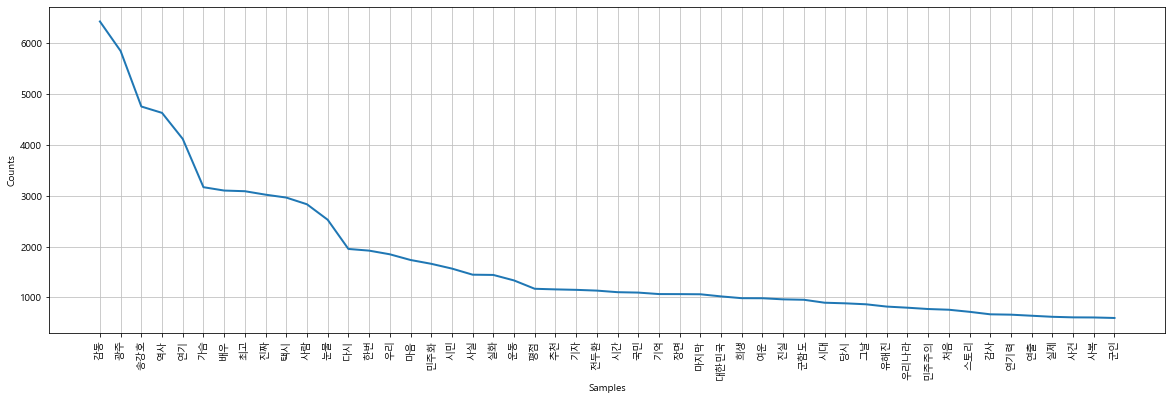

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
ko.plot(50)
plt.show()

In [ ]:
#평점별

In [79]:
score1 = df[df['score'] == 1]
score2 = df[df['score'] == 2]
score3 = df[df['score'] == 3]
score4 = df[df['score'] == 4]
score5 = df[df['score'] == 5]
score6 = df[df['score'] == 6]
score7 = df[df['score'] == 7]
score8 = df[df['score'] == 8]
score9 = df[df['score'] == 9]
score10 = df[df['score'] == 10]

text1 = ' '.join(score1['text'])
text2 = ' '.join(score2['text'])
text3 = ' '.join(score3['text'])
text4 = ' '.join(score4['text'])
text5 = ' '.join(score5['text'])
text6 = ' '.join(score6['text'])
text7 = ' '.join(score7['text'])
text8 = ' '.join(score8['text'])
text9 = ' '.join(score9['text'])
text10 = ' '.join(score10['text'])

tokens_ko11 = t.nouns(text1)
tokens_ko22 = t.nouns(text2)
tokens_ko33 = t.nouns(text3)
tokens_ko44 = t.nouns(text4)
tokens_ko55 = t.nouns(text5)
tokens_ko66 = t.nouns(text6)
tokens_ko77 = t.nouns(text7)
tokens_ko88 = t.nouns(text8)
tokens_ko99 = t.nouns(text9)
tokens_ko1010 = t.nouns(text10)

In [50]:
stopwords = ['때','꼭','모두','번','또','내용','좀','왜','내내','대해','만','라면','정도','내','이야기','모든','일','위해','느낌','저','거','하나','김','부분','나',
'그때','가장','올해','안','함','영화로','듯','조금','상황','중간','제','중','이영화','임','때문','계속','일이','전','요','날','눈','자체','속','게','모습','최근','살','얼마나','대한','완전','아주','이건','울','절','제대로','오늘','개','끝',
'준','앞','걸','영화관','감','못','더욱','한국영','뭐','자','통해','보기','다른','세상','해','영화인','절대','관객','줄','도','아이','개봉','기분','이유','이제','위',
'덕분','간만','이해','계기','여러분','전개','영상','제발','음','옴','무엇','후','재','곳','움','의','그대로','뜻','뒤','강','동안','무조건','바로','건','또한','뭔가','과','힘','순간','잘만',
'맘','총','씬','배경','약간','표','재밋','난','대사','누구','현재','아들','최고다','란','류준','친구','영화','점','왜','이','그','것','그냥','재미','말','생각','더','보고',
'연시','운전사','정말','볼','수','지금','무슨','나라','버스','역시','은','영화','그','이','수','더','것','점','말','불','알','분','돈']

In [81]:
ko1 = nltk.Text(tokens_ko11, name='전체평점1')
ko1 = [each_word for each_word in ko1 if each_word not in stopwords] 
ko1 = nltk.Text(ko1, name='전체평점1')

ko2 = nltk.Text(tokens_ko22, name='전체평점2')
ko2= [each_word for each_word in ko2 if each_word not in stopwords] 
ko2 = nltk.Text(ko2, name='전체평점2')

ko3 = nltk.Text(tokens_ko33, name='전체평점3')
ko3 = [each_word for each_word in ko3 if each_word not in stopwords] 
ko3 = nltk.Text(ko3, name='전체평점3')

ko4 = nltk.Text(tokens_ko44, name='전체평점4')
ko4 = [each_word for each_word in ko4 if each_word not in stopwords] 
ko4 = nltk.Text(ko4, name='전체평점4')

ko5 = nltk.Text(tokens_ko55, name='전체평점5')
ko5 = [each_word for each_word in ko5 if each_word not in stopwords] 
ko5 = nltk.Text(ko5, name='전체평점5')

ko6 = nltk.Text(tokens_ko66, name='전체평점6')
ko6 = [each_word for each_word in ko6 if each_word not in stopwords] 
ko6 = nltk.Text(ko6, name='전체평점6')

ko7 = nltk.Text(tokens_ko77, name='전체평점7')
ko7 = [each_word for each_word in ko7 if each_word not in stopwords] 
ko7 = nltk.Text(ko7, name='전체평점7')

ko8 = nltk.Text(tokens_ko88, name='전체평점8')
ko8 = [each_word for each_word in ko8 if each_word not in stopwords] 
ko8 = nltk.Text(ko8, name='전체평점8')

ko9 = nltk.Text(tokens_ko99, name='전체평점9')
ko9 = [each_word for each_word in ko9 if each_word not in stopwords] 
ko9 = nltk.Text(ko9, name='전체평점9')

ko10 = nltk.Text(tokens_ko1010, name='전체평점10')
ko10 = [each_word for each_word in ko10 if each_word not in stopwords] 
ko10 = nltk.Text(ko10, name='전체평점10')

In [94]:
#kon 바꾸면서
ko1.vocab().most_common(60)

[('광주', 293),
 ('평점', 199),
 ('폭동', 177),
 ('미화', 160),
 ('역사', 154),
 ('선동', 146),
 ('택시', 142),
 ('정치', 117),
 ('감성', 116),
 ('진짜', 110),
 ('감동', 108),
 ('사람', 106),
 ('송강호', 105),
 ('사실', 101),
 ('군인', 100),
 ('민주화', 100),
 ('팔이', 99),
 ('군함도', 94),
 ('전라도', 92),
 ('왜곡', 86),
 ('시민', 84),
 ('좌파', 74),
 ('노잼', 74),
 ('운동', 73),
 ('별로', 71),
 ('억지', 71),
 ('연기', 63),
 ('소재', 63),
 ('수준', 56),
 ('배우', 55),
 ('전형', 54),
 ('역사왜곡', 54),
 ('총기', 54),
 ('사태', 54),
 ('신파', 53),
 ('폭도', 51),
 ('경찰', 50),
 ('무기고', 50),
 ('스토리', 48),
 ('눈물', 47),
 ('감독', 46),
 ('장면', 46),
 ('쓰레기', 45),
 ('무장', 44),
 ('탈취', 44),
 ('휴가', 43),
 ('시위', 43),
 ('한국', 42),
 ('최악', 40),
 ('북한', 39),
 ('알바', 39),
 ('실화', 38),
 ('연출', 37),
 ('습격', 37),
 ('마지막', 34),
 ('진실', 34),
 ('언제', 34),
 ('빨갱이', 34),
 ('정권', 34),
 ('실망', 33)]

In [105]:
#가설4. 평점1점에서 정치적 단어 빈도 확인
print(text10.count('좌파'))
print(text10.count('좌빨'))
print(text10.count('좌편향'))
print(text10.count('간첩'))
print(text10.count('북한'))
print(text10.count('미화'))
print(text10.count('폭동'))
print(text10.count('폭도'))
print(text10.count('전라도'))
print(text10.count('유공'))
print(text10.count('픽션'))
print(text10.count('역사왜곡'))

37
8
1
10
31
25
169
67
78
11
80
26


- 실관람객

In [48]:
df2 = df[df['watch_movie']==True]
df2

Unnamed: 0              time                 ID  \
0               0   2017-08-02 9:29        달(muni****)   
1               1   2017-08-02 9:28           gold****   
2               2   2017-08-02 9:24      고이오(jumi****)   
5               5  2017-08-02 11:26  오징어핑쿠도리(jsad****)   
10             10   2017-08-02 9:23   zenzen(seai****)   
...           ...               ...                ...   
48737       48737   2017-08-03 9:54     더블에이(i2us****)   
48738       48738  2017-08-06 13:13           jwle****   
48739       48739  2017-08-02 18:14           amd8****   
48740       48740  2017-08-02 15:24           anfl****   
48741       48741  2017-08-02 16:10       닉값(gus_****)   

                                                    text  score   like  \
0      송강호 유해진 류준열이 한번씩 눈물 쏟게 만듦.. 그날의 광주에 택시운전사와 함께 ...     10  18539   
1                             최근에 본 영화중 가장 돈이 안 아까운 영화!      10  16880   
2      신파일까봐 걱정했는데 신파는 커녕 눈물이 날만하면 가차없이 유쾌함을 던져주던 담백한...     10  13315   
5      단순히 픽션인줄 알았더니 사실에 기반한 영화였다.보는내내 눈물났고,옆자리 할머니 할...     10   8347   
10     아.. 아침부터 여운이.. 그날을 바라보는 새로운 시선과 감동 웃음의 적절한 드라마...     10   4339   
...                                                  ...    ...    ...   
48737                                    평점은 공장에서 조작되었다       3     68   
48738  영화 선동 참 쉽네. 한쪽 단면만 보여주면서 개미같은 백성들 혼을 쏙 빼놓기 쉽네....      1     60   
48739                                     픽션이 너무 많았음...       3     69   
48740                              그저 그런 영화웬만하면 보지말길...       3     74   
48741  이 영화는 판타지영화다.역사적 사실을 부정하는게 아니라 내용이 그렇다.앞뒤내용이 너...      1    102   

       dislike  watch_movie  
0         1856         True  
1         1888         True  
2         1451         True  
5          597         True  
10         366         True  
...        ...          ...  
48737      265         True  
48738      258         True  
48739      279         True  
48740      322         True  
48741      492         True  

[18917 rows x 8 columns]

In [ ]:
#전체

In [49]:
text = ' '.join(df2['text'])
t = Okt()
tokens_ko = t.nouns(text)
ko = nltk.Text(tokens_ko, name='실관람객전체')
ko = [each_word for each_word in ko if each_word not in stopwords] 
ko = nltk.Text(ko, name='실관람객전체')
ko.vocab().most_common(300)

NameError: name 'stopwords' is not defined

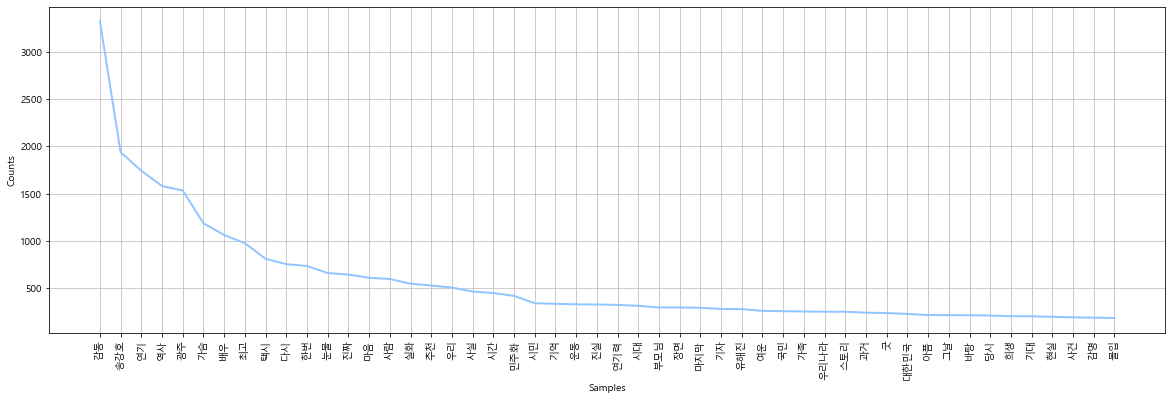

In [111]:
plt.figure(figsize=(20,6))
ko.plot(50)
plt.show()

In [ ]:
#평점별

In [51]:
score1 = df2[df2['score'] == 1]
score2 = df2[df2['score'] == 2]
score3 = df2[df2['score'] == 3]
score4 = df2[df2['score'] == 4]
score5 = df2[df2['score'] == 5]
score6 = df2[df2['score'] == 6]
score7 = df2[df2['score'] == 7]
score8 = df2[df2['score'] == 8]
score9 = df2[df2['score'] == 9]
score10 = df2[df2['score'] == 10]

text1 = ' '.join(score1['text'])
text2 = ' '.join(score2['text'])
text3 = ' '.join(score3['text'])
text4 = ' '.join(score4['text'])
text5 = ' '.join(score5['text'])
text6 = ' '.join(score6['text'])
text7 = ' '.join(score7['text'])
text8 = ' '.join(score8['text'])
text9 = ' '.join(score9['text'])
text10 = ' '.join(score10['text'])

tokens_ko11 = t.nouns(text1)
tokens_ko22 = t.nouns(text2)
tokens_ko33 = t.nouns(text3)
tokens_ko44 = t.nouns(text4)
tokens_ko55 = t.nouns(text5)
tokens_ko66 = t.nouns(text6)
tokens_ko77 = t.nouns(text7)
tokens_ko88 = t.nouns(text8)
tokens_ko99 = t.nouns(text9)
tokens_ko1010 = t.nouns(text10)

In [52]:
ko1 = nltk.Text(tokens_ko11, name='관람객평점1')
ko1 = [each_word for each_word in ko1 if each_word not in stopwords] 
ko1 = nltk.Text(ko1, name='관람객평점1')

ko2 = nltk.Text(tokens_ko22, name='관람객평점2')
ko2= [each_word for each_word in ko2 if each_word not in stopwords] 
ko2 = nltk.Text(ko2, name='관람객평점2')

ko3 = nltk.Text(tokens_ko33, name='관람객평점3')
ko3 = [each_word for each_word in ko3 if each_word not in stopwords] 
ko3 = nltk.Text(ko3, name='관람객평점3')

ko4 = nltk.Text(tokens_ko44, name='관람객평점4')
ko4 = [each_word for each_word in ko4 if each_word not in stopwords] 
ko4 = nltk.Text(ko4, name='관람객평점4')

ko5 = nltk.Text(tokens_ko55, name='관람객평점5')
ko5 = [each_word for each_word in ko5 if each_word not in stopwords] 
ko5 = nltk.Text(ko5, name='관람객평점5')

ko6 = nltk.Text(tokens_ko66, name='관람객평점6')
ko6 = [each_word for each_word in ko6 if each_word not in stopwords] 
ko6 = nltk.Text(ko6, name='관람객평점6')

ko7 = nltk.Text(tokens_ko77, name='관람객평점7')
ko7 = [each_word for each_word in ko7 if each_word not in stopwords] 
ko7 = nltk.Text(ko7, name='관람객평점7')

ko8 = nltk.Text(tokens_ko88, name='관람객평점8')
ko8 = [each_word for each_word in ko8 if each_word not in stopwords] 
ko8 = nltk.Text(ko8, name='관람객평점8')

ko9 = nltk.Text(tokens_ko99, name='관람객평점9')
ko9 = [each_word for each_word in ko9 if each_word not in stopwords] 
ko9 = nltk.Text(ko9, name='관람객평점9')

ko10 = nltk.Text(tokens_ko1010, name='관람객평점10')
ko10 = [each_word for each_word in ko10 if each_word not in stopwords] 
ko10 = nltk.Text(ko10, name='관람객평점10')

In [57]:
ko10.vocab().most_common(90)

[('감동', 2190),
 ('송강호', 1093),
 ('연기', 920),
 ('광주', 896),
 ('역사', 892),
 ('최고', 837),
 ('가슴', 784),
 ('배우', 605),
 ('진짜', 565),
 ('다시', 475),
 ('한번', 465),
 ('눈물', 452),
 ('택시', 409),
 ('마음', 381),
 ('사람', 381),
 ('추천', 342),
 ('우리', 311),
 ('실화', 294),
 ('시간', 276),
 ('민주화', 260),
 ('사실', 221),
 ('시민', 208),
 ('기억', 199),
 ('진실', 198),
 ('국민', 197),
 ('운동', 195),
 ('부모님', 192),
 ('유해진', 187),
 ('여운', 182),
 ('연기력', 173),
 ('대한민국', 166),
 ('가족', 160),
 ('시대', 160),
 ('우리나라', 160),
 ('굿', 157),
 ('과거', 140),
 ('기자', 133),
 ('그날', 128),
 ('희생', 127),
 ('감명', 125),
 ('인생', 120),
 ('장면', 120),
 ('당시', 116),
 ('화가', 108),
 ('몰입', 106),
 ('민주주의', 105),
 ('아픔', 102),
 ('대박', 101),
 ('감사', 101),
 ('관람', 100),
 ('스토리', 99),
 ('바탕', 98),
 ('현실', 98),
 ('마지막', 97),
 ('엄마', 96),
 ('짱', 96),
 ('류준열', 94),
 ('강추', 91),
 ('웃음', 90),
 ('사건', 90),
 ('전두환', 89),
 ('작품', 89),
 ('실제', 89),
 ('표현', 87),
 ('슬픔', 86),
 ('사복', 85),
 ('기사', 84),
 ('후회', 84),
 ('감정', 83),
 ('의미', 83),
 ('기도', 79),
 ('해지', 75),

In [60]:
print(text.count('좌파'))
print(text.count('좌빨'))
print(text.count('좌편향'))
print(text.count('간첩'))
print(text.count('북한'))
print(text.count('미화'))
print(text.count('폭동'))
print(text.count('폭도'))
print(text.count('전라도'))
print(text.count('유공'))
print(text.count('픽션'))
print(text.count('역사왜곡'))

5
1
2
1
8
16
24
10
19
1
41
5


- 네티즌만

In [132]:
df3 = df[df['watch_movie']==False]

In [133]:
text = ' '.join(df3['text'])
t = Okt()
tokens_ko = t.nouns(text)
ko = nltk.Text(tokens_ko, name='네티즌전체')
ko = [each_word for each_word in ko if each_word not in stopwords] 
ko = nltk.Text(ko, name='네티즌전체')
ko.vocab().most_common(300)

[('광주', 4312),
 ('감동', 3102),
 ('역사', 3048),
 ('송강호', 2816),
 ('진짜', 2378),
 ('연기', 2374),
 ('사람', 2236),
 ('택시', 2154),
 ('최고', 2114),
 ('배우', 2040),
 ('가슴', 1982),
 ('눈물', 1869),
 ('우리', 1344),
 ('민주화', 1245),
 ('시민', 1229),
 ('다시', 1201),
 ('한번', 1187),
 ('마음', 1128),
 ('평점', 1104),
 ('운동', 1008),
 ('전두환', 993),
 ('사실', 985),
 ('실화', 897),
 ('기자', 871),
 ('국민', 841),
 ('군함도', 831),
 ('대한민국', 795),
 ('희생', 784),
 ('장면', 772),
 ('마지막', 772),
 ('기억', 734),
 ('여운', 727),
 ('당시', 676),
 ('시간', 657),
 ('그날', 653),
 ('처음', 642),
 ('진실', 637),
 ('추천', 632),
 ('민주주의', 613),
 ('시대', 585),
 ('우리나라', 550),
 ('유해진', 544),
 ('감사', 536),
 ('군인', 506),
 ('연출', 486),
 ('사복', 471),
 ('감독', 470),
 ('스토리', 469),
 ('인생', 449),
 ('실제', 448),
 ('사건', 419),
 ('표현', 418),
 ('평론가', 413),
 ('기사', 394),
 ('아픔', 379),
 ('소재', 378),
 ('폭동', 378),
 ('감정', 355),
 ('현실', 352),
 ('연기력', 341),
 ('몰입', 339),
 ('억지', 338),
 ('한국', 327),
 ('천만', 313),
 ('독일', 306),
 ('류준열', 304),
 ('슬픔', 303),
 ('작품', 300),
 ('웃음', 299)

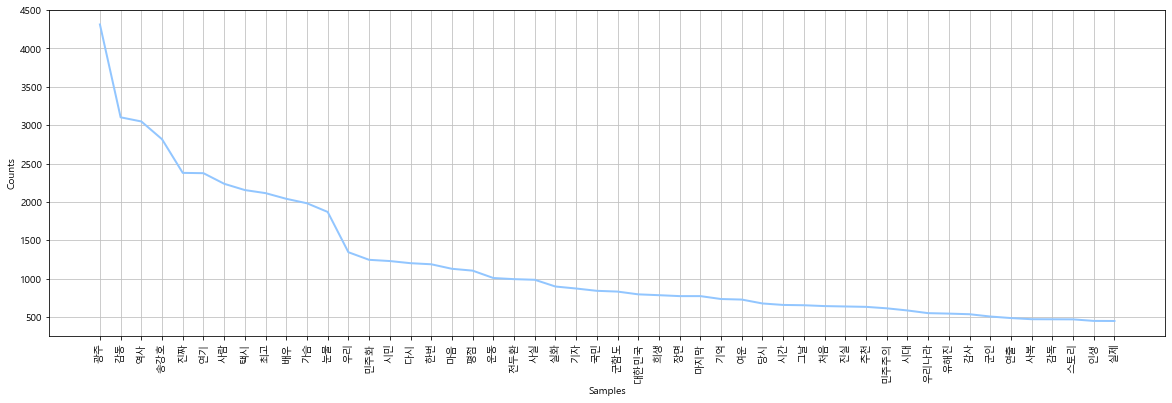

In [134]:
plt.figure(figsize=(20,6))
ko.plot(50)
plt.show()

In [135]:
score1 = df3[df3['score'] == 1]
score2 = df3[df3['score'] == 2]
score3 = df3[df3['score'] == 3]
score4 = df3[df3['score'] == 4]
score5 = df3[df3['score'] == 5]
score6 = df3[df3['score'] == 6]
score7 = df3[df3['score'] == 7]
score8 = df3[df3['score'] == 8]
score9 = df3[df3['score'] == 9]
score10 = df3[df3['score'] == 10]

text1 = ' '.join(score1['text'])
text2 = ' '.join(score2['text'])
text3 = ' '.join(score3['text'])
text4 = ' '.join(score4['text'])
text5 = ' '.join(score5['text'])
text6 = ' '.join(score6['text'])
text7 = ' '.join(score7['text'])
text8 = ' '.join(score8['text'])
text9 = ' '.join(score9['text'])
text10 = ' '.join(score10['text'])

tokens_ko11 = t.nouns(text1)
tokens_ko22 = t.nouns(text2)
tokens_ko33 = t.nouns(text3)
tokens_ko44 = t.nouns(text4)
tokens_ko55 = t.nouns(text5)
tokens_ko66 = t.nouns(text6)
tokens_ko77 = t.nouns(text7)
tokens_ko88 = t.nouns(text8)
tokens_ko99 = t.nouns(text9)
tokens_ko1010 = t.nouns(text10)

In [136]:
ko1 = nltk.Text(tokens_ko11, name='네티즌평점1')
ko1 = [each_word for each_word in ko1 if each_word not in stopwords] 
ko1 = nltk.Text(ko1, name='네티즌평점1')

ko2 = nltk.Text(tokens_ko22, name='네티즌평점2')
ko2= [each_word for each_word in ko2 if each_word not in stopwords] 
ko2 = nltk.Text(ko2, name='네티즌평점2')

ko3 = nltk.Text(tokens_ko33, name='네티즌평점3')
ko3 = [each_word for each_word in ko3 if each_word not in stopwords] 
ko3 = nltk.Text(ko3, name='네티즌평점3')

ko4 = nltk.Text(tokens_ko44, name='네티즌평점4')
ko4 = [each_word for each_word in ko4 if each_word not in stopwords] 
ko4 = nltk.Text(ko4, name='네티즌평점4')

ko5 = nltk.Text(tokens_ko55, name='네티즌평점5')
ko5 = [each_word for each_word in ko5 if each_word not in stopwords] 
ko5 = nltk.Text(ko5, name='네티즌평점5')

ko6 = nltk.Text(tokens_ko66, name='네티즌평점6')
ko6 = [each_word for each_word in ko6 if each_word not in stopwords] 
ko6 = nltk.Text(ko6, name='네티즌평점6')

ko7 = nltk.Text(tokens_ko77, name='네티즌평점7')
ko7 = [each_word for each_word in ko7 if each_word not in stopwords] 
ko7 = nltk.Text(ko7, name='네티즌평점7')

ko8 = nltk.Text(tokens_ko88, name='네티즌평점8')
ko8 = [each_word for each_word in ko8 if each_word not in stopwords] 
ko8 = nltk.Text(ko8, name='네티즌평점8')

ko9 = nltk.Text(tokens_ko99, name='네티즌평점9')
ko9 = [each_word for each_word in ko9 if each_word not in stopwords] 
ko9 = nltk.Text(ko9, name='네티즌평점9')

ko10 = nltk.Text(tokens_ko1010, name='네티즌평점10')
ko10 = [each_word for each_word in ko10 if each_word not in stopwords] 
ko10 = nltk.Text(ko10, name='네티즌평점10')

In [146]:
ko1.vocab().most_common(90)

[('광주', 290),
 ('평점', 198),
 ('폭동', 175),
 ('미화', 158),
 ('역사', 149),
 ('선동', 144),
 ('택시', 141),
 ('감성', 115),
 ('정치', 115),
 ('진짜', 109),
 ('사람', 106),
 ('송강호', 105),
 ('감동', 104),
 ('민주화', 100),
 ('사실', 99),
 ('팔이', 99),
 ('군인', 98),
 ('전라도', 92),
 ('군함도', 90),
 ('시민', 83),
 ('왜곡', 83),
 ('운동', 73),
 ('좌파', 72),
 ('노잼', 72),
 ('억지', 70),
 ('별로', 67),
 ('연기', 63),
 ('소재', 63),
 ('수준', 55),
 ('전형', 54),
 ('배우', 54),
 ('총기', 54),
 ('사태', 54),
 ('역사왜곡', 53),
 ('신파', 53),
 ('폭도', 51),
 ('무기고', 50),
 ('경찰', 49),
 ('스토리', 48),
 ('눈물', 47),
 ('장면', 45),
 ('쓰레기', 44),
 ('무장', 44),
 ('감독', 43),
 ('휴가', 43),
 ('탈취', 43),
 ('시위', 43),
 ('한국', 42),
 ('최악', 39),
 ('북한', 39),
 ('알바', 39),
 ('실화', 38),
 ('연출', 37),
 ('습격', 37),
 ('마지막', 34),
 ('진실', 34),
 ('언제', 34),
 ('빨갱이', 34),
 ('정권', 34),
 ('실망', 33),
 ('좌빨', 32),
 ('점도', 32),
 ('천만', 31),
 ('사건', 31),
 ('평가', 30),
 ('국민', 30),
 ('유공', 29),
 ('놈', 29),
 ('한쪽', 29),
 ('진심', 29),
 ('군', 29),
 ('시간', 28),
 ('계엄', 28),
 ('이상', 27),
 ('전두환', 26),
 

In [149]:
print(text10.count('좌파'))
print(text10.count('좌빨'))
print(text10.count('좌편향'))
print(text10.count('간첩'))
print(text10.count('북한'))
print(text10.count('미화'))
print(text10.count('폭동'))
print(text10.count('폭도'))
print(text10.count('전라도'))
print(text10.count('유공'))
print(text10.count('픽션'))
print(text10.count('역사왜곡'))

35
7
0
9
26
23
156
60
64
10
57
24


In [150]:
print(len(ko.tokens))

153226


In [158]:
bindo = pd.DataFrame(ko.vocab().most_common(153226))
bindo[bindo[1]>=100].tail(100)

0    1
121  몰입도  151
122   민주  151
123  쓰레기  151
124   감명  151
125    등  151
126   새끼  150
127   화보  148
128   인상  146
129   펑펑  143
130    명  143
131   당신  139
132   수준  139
133   전형  139
134    굿  139
135  위르겐  138
136   팔이  137
137   방금  135
138   자신  134
139    피  133
140    집  133
141    뿐  133
142   영웅  131
143   폭도  128
144   노력  128
145    욕  127
146   극장  127
147   정신  127
148    온  127
149   점수  127
150   자유  126
151    별  126
152   소름  125
153    애  124
154    신  124
155   직접  124
156   픽션  122
157   좌파  121
158   언론  121
159   울림  120
160   이후  120
161   초반  120
162   이번  119
163   인물  119
164   비교  119
165   보지  119
166   필요  119
167  한국인  117
168   다가  117
169   충격  117
170    니  116
171   신분  116
172   실감  116
173    짱  116
174   타고  115
175   미래  114
176   실망  114
177   전달  114
178  아쉬움  114
179   댓글  113
180    부  113
181   얘기  113
182   입장  112
183  인터뷰  112
184   학생  111
185   안보  111
186    두  111
187   묘사  110
188   집중  110
189   민족  109
190  억지로  109
191    죽  109
192   요소  109
193    군  109
194   다큐  109
195   시작  108
196   엄마  108
197  주인공  108
198   보시  107
199    옆  107
200   공부  107
201    남  106
202   가치  106
203   항상  105
204  변호인  105
205   소리  105
206   다운  105
207   용기  104
208  반드시  104
209   구성  104
210  일베충  103
211   사회  103
212   만점  103
213   고통  102
214    추  101
215  송광호  101
216   아빠  100
217  외국인  100
218   그것  100
219   학살  100
220    손  100

In [ ]:
#단어 위치 확인으로 의심단어가 1점에 존재하는지? 